# Intrustion Detection System
## Network Traffic Classification

<b>Dataset:</b> <i>CSC IDS 2018</i><br>
<a href="./Datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv">Description</a>

<b>Target Variable:</b> <i>Label</i> 
* Benign
* DoS attacks-GoldenEye
* DoS attacks-Slowloris
* Brute Force -Web
* Brute Force -XSS 
* SQL Injection            
* Infilteration   


<b>Key Objectives:</b>
1. Import Libraries & Load Dataset 
2. Describe Data 
3. Verify Data Quality
4. Data Preparation 
5. Convert Objects to Numerical 
6. Export Data

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load dataset

* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [3]:
#provide the path of the dataset
df = pd.read_csv("./Datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv")


#df = pd.read_csv("./Datasets/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv")

# df = pd.read_csv("../../../Downloads/CSC IDS 2018/Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")
# df_big = pd.read_csv("../../../Downloads/CSC IDS 2018/Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")
#df20180222 = pd.read_csv("./Datasets/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv")
#df20180301 = pd.read_csv("./Datasets/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv")

## Describe the Data

In [4]:
# check if data is loaded correctly
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [5]:
df.describe

<bound method NDFrame.describe of          Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  15/02/2018 08:25:18      112641158             3   
1              22         6  15/02/2018 08:29:05       37366762            14   
2           47514         6  15/02/2018 08:29:42            543             2   
3               0         0  15/02/2018 08:28:07      112640703             3   
4               0         0  15/02/2018 08:30:56      112640874             3   
...           ...       ...                  ...            ...           ...   
1048570     50111         6  15/02/2018 09:04:42             22             3   
1048571       443         6  15/02/2018 09:03:55       54682783             5   
1048572       443         6  15/02/2018 09:03:56       53682093             5   
1048573       443         6  15/02/2018 09:03:55       54683364             5   
1048574       443         6  15/02/2018 09:02:01      116857161            

In [6]:
# Check the dimensions
df.shape

# df20180222.shape
# (1048575, 80)

# df20180301.shape
# (331125, 80)

# df_big.shape
# (7948748, 84)

(1048575, 80)

In [7]:
#Check the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
Dst Port             1048575 non-null int64
Protocol             1048575 non-null int64
Timestamp            1048575 non-null object
Flow Duration        1048575 non-null int64
Tot Fwd Pkts         1048575 non-null int64
Tot Bwd Pkts         1048575 non-null int64
TotLen Fwd Pkts      1048575 non-null int64
TotLen Bwd Pkts      1048575 non-null int64
Fwd Pkt Len Max      1048575 non-null int64
Fwd Pkt Len Min      1048575 non-null int64
Fwd Pkt Len Mean     1048575 non-null float64
Fwd Pkt Len Std      1048575 non-null float64
Bwd Pkt Len Max      1048575 non-null int64
Bwd Pkt Len Min      1048575 non-null int64
Bwd Pkt Len Mean     1048575 non-null float64
Bwd Pkt Len Std      1048575 non-null float64
Flow Byts/s          1043654 non-null object
Flow Pkts/s          1048575 non-null object
Flow IAT Mean        1048575 non-null float64
Flow IAT Std         1048575 non-null 

In [8]:
#Check for Column Names
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [9]:
#Get the Stats on the Data
df.describe(include='all')

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,33862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,15/02/2018 09:53:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,NaN,NaN,728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,996077
mean,7.392499e+03,9.518465e+00,NaN,1.430739e+07,5.145998e+00,6.419784e+00,4.354262e+02,4.925884e+03,1.514397e+02,1.397992e+01,...,1.659039e+01,1.122396e+05,4.836921e+04,1.817948e+05,8.320523e+04,4.347475e+06,2.658500e+05,4.616676e+06,4.109270e+06,NaN
std,1.753869e+04,5.303721e+00,NaN,3.335503e+07,3.379921e+01,9.786280e+01,2.881334e+04,1.399474e+05,2.774302e+02,2.382720e+01,...,7.476644e+00,9.456190e+05,3.772539e+05,1.205154e+06,8.678863e+05,1.422425e+07,2.349741e+06,1.486555e+07,1.398498e+07,NaN
min,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.300000e+01,6.000000e+00,NaN,4.130000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,8.000000e+01,6.000000e+00,NaN,3.689600e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.900000e+01,4.100000e+01,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,4.450000e+02,1.700000e+01,NaN,3.377079e+06,5.000000e+00,4.000000e+00,3.330000e+02,4.880000e+02,1.610000e+02,3.500000e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [10]:
df.tail(5)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1048570,50111,6,15/02/2018 09:04:42,22,3,0,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.0000,0,0,Benign
1048571,443,6,15/02/2018 09:03:55,54682783,5,1,123,46,46,0,...,20,158783.0,0.000000,158783,158783,54523813.0,0.0000,54523813,54523813,Benign
1048572,443,6,15/02/2018 09:03:56,53682093,5,1,123,46,46,0,...,20,259719.0,0.000000,259719,259719,53421756.0,0.0000,53421756,53421756,Benign
1048573,443,6,15/02/2018 09:03:55,54683364,5,1,123,46,46,0,...,20,158870.0,0.000000,158870,158870,54523593.0,0.0000,54523593,54523593,Benign
1048574,443,6,15/02/2018 09:02:01,116857161,18,17,1066,5265,281,0,...,20,221407.0,48231.753545,255512,187302,58082282.0,183221.2665,58211839,57952725,Benign


In [11]:
df['Label'].value_counts()
# Benign                   996077
# DoS attacks-GoldenEye     41508
# DoS attacks-Slowloris     10990
# Name: Label, dtype: int64

# df_big
# Benign                    7372557
# DDoS attacks-LOIC-HTTP     576191
# Name: Label, dtype: int64

Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

In [12]:
#df20180222['Label'].value_counts()
# Benign              1048213
# Brute Force -Web        249
# Brute Force -XSS         79
# SQL Injection            34
# Name: Label, dtype: int64

In [13]:
# df20180301['Label'].value_counts()
# Benign           238037
# Infilteration     93063
# Label                25
# Name: Label, dtype: int64

## Verify Data Quality

Look out for the following:
* Incorrect or unexpected data type & format (ALL)
* Duplicates (ALL)
* Unexpected dimensions (i.e. missing rows or columns) (ALL)
* Incorrect Spelling (CAT)
* Mixed cases for strings (CAT)
* Unexpected outliers or anomalous values (NUM)
* Inconsistent or incorrect units of measurement (NUM)

In [14]:
# Incorrect or unexpected data type & format (ALL)
df.dtypes

Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int64
Idle Min           int64
Label             object
Length: 80, dtype: object

In [15]:
# Duplicates (ALL). 
# Checks for Duplicated Samples
df.duplicated().value_counts()

False    1046174
True        2401
dtype: int64

## Data Preparation

### Removing Null Rows

In [16]:
df.columns[df.isna().any()].tolist()

['Flow Byts/s']

In [17]:
df_nulls = df[df.isna().any(axis=1)]
df_nulls.shape

(4921, 80)

In [18]:
# all the row with null values
df_nulls['Label'].value_counts() 

Benign    4921
Name: Label, dtype: int64

In [19]:
# remove null rows 
df_nonulls = df.dropna()

# remove headers
df_nonulls.drop(df_nonulls[df_nonulls['Label'] == 'Label'].index, inplace=True)

df_nonulls.shape

(1043654, 80)

In [20]:
df_nonulls[df_nonulls.isna().any(axis=1)]
# should be empty now

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


## Convert the Objects to Numerical

### Convert Label from Categorical to Numerical
* Benign - 0
* Non-Benign - 1

In [21]:
# Convert All Benign to 0 and all others (Non-Benign) to 1
df_nonulls.Label[df.Label == 'Benign'] = 0
df_nonulls.Label[df.Label != 'Benign'] = 1
df_nonulls['Label'] = df_nonulls['Label'].astype(int)

In [22]:
df_nonulls.Label.unique()

array([0, 1])

### Convert Timestamp from Object to DateTime

In [23]:
# Keep this for now as place holder for future 
df_nonulls['Timestamp'] = pd.to_datetime(df_nonulls['Timestamp'], infer_datetime_format=True)
# df_nonulls['Timestamp'].dt.hour.unique()
# df_nonulls['Timestamp'].dt.minute.unique()

### Drop Timestamp from DataFrame

In [24]:
# A bit unnecessary to convert to timestamp before changing it, but keeping as reminder
df_nonulls.drop('Timestamp', axis=1, inplace=True)

### Convert 'Flow Byts/s' & 'Flow Pkts/s'  from Object to Float

In [25]:
df_nonulls['Flow Byts/s'] = df_nonulls['Flow Byts/s'].astype(float)
df_nonulls['Flow Pkts/s'] = df_nonulls['Flow Pkts/s'].astype(float)

### Keep only finite values to avoid INF or NaN in Describe

In [26]:
# Identifying rows with only finite values (two different ways)
#df_subset = df_nonulls[np.isfinite(df_nonulls).all(1)]
df_subset = df_nonulls[~df_nonulls.isin([np.nan, np.inf, -np.inf]).any(1)]

In [27]:
print(df_nonulls.shape, df_subset.shape)

(1043654, 79) (1040548, 79)


In [28]:
# Identifying the rows that cause issues later down the line
# This is a resource intensive operation as you merge the two sets
# May want to skip this to avoid processing time
# df_diff = pd.merge(df_nonulls, df_subset, how='outer', indicator='Exist')
# df_diff = df_diff.loc[df_diff['Exist'] != 'both']
# df_diff.describe()

In [29]:
# df_nonulls.shape, df_subset.shape, df_diff.shape

In [30]:
# This is a problem column, possibly caused by conversion from Object to Float
# df_diff['Flow Byts/s'].describe()

In [31]:
# This is another problem column, possibly caused by conversion from Object to Float
# df_diff['Flow Pkts/s'].describe()

In [32]:
df_nonulls = df_subset

### Re-Check DataFrame Objects


In [33]:
#Check the features
df_nonulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040548 entries, 0 to 1048574
Data columns (total 79 columns):
Dst Port             1040548 non-null int64
Protocol             1040548 non-null int64
Flow Duration        1040548 non-null int64
Tot Fwd Pkts         1040548 non-null int64
Tot Bwd Pkts         1040548 non-null int64
TotLen Fwd Pkts      1040548 non-null int64
TotLen Bwd Pkts      1040548 non-null int64
Fwd Pkt Len Max      1040548 non-null int64
Fwd Pkt Len Min      1040548 non-null int64
Fwd Pkt Len Mean     1040548 non-null float64
Fwd Pkt Len Std      1040548 non-null float64
Bwd Pkt Len Max      1040548 non-null int64
Bwd Pkt Len Min      1040548 non-null int64
Bwd Pkt Len Mean     1040548 non-null float64
Bwd Pkt Len Std      1040548 non-null float64
Flow Byts/s          1040548 non-null float64
Flow Pkts/s          1040548 non-null float64
Flow IAT Mean        1040548 non-null float64
Flow IAT Std         1040548 non-null float64
Flow IAT Max         1040548 non-nu

In [34]:
df_nonulls.shape

(1040548, 79)

### Check Label Balance

<i>Hint: Since we'll be using GridSearchCV, no need to further split into train and test set. Only split into predictor and target variables</i>

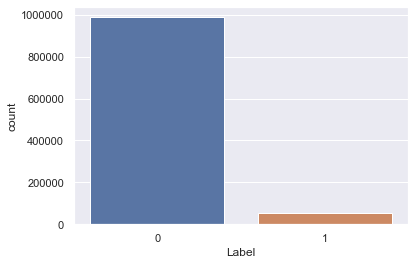

In [35]:
#Target variable is "Label"
X = df_nonulls.drop("Label", axis=1)
y = df_nonulls.Label

sns.set(font_scale=1)
sns.countplot(y)
# Benign
# DoS attacks-GoldenEye
# DoS attacks-Slowloris

In [36]:
# Subset of Features
# df_subset = df_nonulls[['URG Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','Protocol',
#         'Pkt Size Avg','Flow Pkts/s','FIN Flag Cnt','ECE Flag Cnt','ACK Flag Cnt','Dst Port','Label']]
# df_subset.info(verbose=True)

In [37]:
print(X.shape,y.shape)

(1040548, 78) (1040548,)


### Build Training Set using SMOTE

In [38]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 988050, 1: 52498})
Counter({0: 494025, 1: 494025})


In [39]:
# Copy training set
df_training_set = pd.concat([X_train,y_train], axis=1)

In [40]:
X_train.shape, y_train.shape

((988050, 78), (988050,))

In [41]:
df_training_set.shape

(988050, 79)

## Export Data

In [42]:
df_training_set["Label"].value_counts()

Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

#### Honestly unsure if I need to export to CSV if I have PKL file

In [ ]:
df_nonulls.to_csv("./Datasets/Processed-Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv")
df_training_set.to_csv("./Datasets/SMOTE-Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv")

#df_nonulls.to_csv("./Datasets/Processed-Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv")
#df_nonulls.to_csv("../../../Downloads/CSC IDS 2018/Processed-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")


In [ ]:
df_nonulls.to_pickle("./Datasets/Processed-Thursday-15-02-2018_TrafficForML_CICFlowMeter.pkl")
df_training_set.to_pickle("./Datasets/SMOTE-Thursday-15-02-2018_TrafficForML_CICFlowMeter.pkl")
#df_nonulls.to_pickle("./Datasets/Processed-Thursday-01-03-2018_TrafficForML_CICFlowMeter.pkl")
#df_nonulls.to_pickle("../../../Downloads/CSC IDS 2018/Processed-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.pkl")


# EOF